4/4 [==============================] - 1s 4ms/step


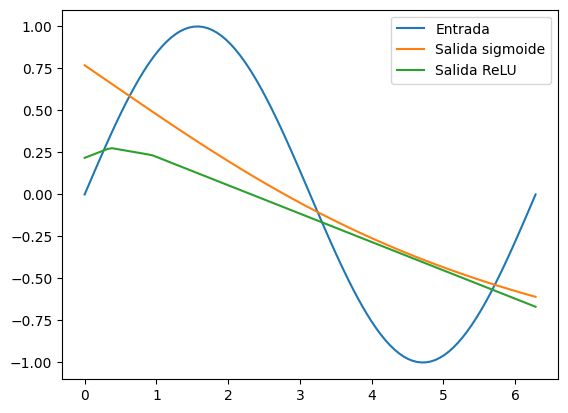

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Definir una secuencia de entrada de 100 pasos de tiempo
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Definir dos RNN con una capa oculta de 10 unidades cada una
# Una con activación sigmoide y otra con activación ReLU
rnn_sigmoid = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(10, activation='sigmoid', input_shape=(None, 1)),
  tf.keras.layers.Dense(1)
])

rnn_relu = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(10, activation='relu', input_shape=(None, 1)),
  tf.keras.layers.Dense(1)
])

# Compilar las RNN con el mismo optimizador y función de pérdida
rnn_sigmoid.compile(optimizer='adam', loss='mse')
rnn_relu.compile(optimizer='adam', loss='mse')

# Entrenar las RNN con los mismos datos y épocas
rnn_sigmoid.fit(x.reshape(-1, 1, 1), y.reshape(-1, 1), epochs=50, verbose=0)
rnn_relu.fit(x.reshape(-1, 1, 1), y.reshape(-1, 1), epochs=50, verbose=0)

# Predecir la salida de las RNN para la misma entrada
y_pred_sigmoid = rnn_sigmoid.predict(x.reshape(-1, 1, 1))
y_pred_relu = rnn_relu.predict(x.reshape(-1, 1, 1))

# Graficar la entrada, la salida real y las salidas predichas por las RNN
plt.plot(x, y, label='Entrada')
plt.plot(x, y_pred_sigmoid, label='Salida sigmoide')
plt.plot(x, y_pred_relu, label='Salida ReLU')
plt.legend()
plt.show()
